In [1]:
%matplotlib widget

In [2]:
# initialization
from rayoptics.environment import *

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

# Create a new model

In [4]:
opm = open_model(root_pth/"codev/tests/threemir.seq")
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']

In [5]:
opm.update_model()

In [6]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+11       air             1  4.9385e+09
    1:     0.000000      300.000       air             1      230.33
    2: -1058.989370     -276.007       air    reflect -1      109.11
 Stop:     0.000000    -0.981318       air            -1      23.719
    4:  -324.065000      319.161       air    reflect  1      35.059
    5:  -453.965160     -321.621       air    reflect -1      93.366
  Img:     0.000000      0.00000                      -1      20.671


In [7]:
sm.list_sg()

               r               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+11          air
    1:      0.00000                 
                     300.000          air
    2:     -1058.99          reflect     dec and return     48.695     8.4386
                    -276.007          air
 Stop:      0.00000                      dec and return     11.445     10.220
                   -0.981318          air
    4:     -324.065          reflect     dec and return     17.562     9.6616
                     319.161          air
    5:     -453.965          reflect     dec and return     67.501     9.5144
                    -321.621          air
  Img:      0.00000                            decenter    -47.681     8.7170


In [8]:
sm.list_decenters(full=True)

              thi    medium/mode          type          x          y       alpha      beta       gamma
    0:  1.00000e+11          air
    1:      300.000          air
    2:                   reflect  dec and return     0.0000     48.695     8.4386     0.0000     0.0000
    2:     -276.007          air
    3:                            dec and return     0.0000     11.445     10.220     0.0000     0.0000
    3:    -0.981318          air
    4:                   reflect  dec and return     0.0000     17.562     9.6616     0.0000     0.0000
    4:      319.161          air
    5:                   reflect  dec and return     0.0000     67.501     9.5144     0.0000     0.0000
    5:     -321.621          air
    6:                     dummy        decenter     0.0000    -47.681     8.7170     0.0000     0.0000


In [9]:
for i, ifc in enumerate(sm.ifcs[1:-1], start=1):
    print(f'{i}:', ifc.profile.listobj_str())

1: profile: Spherical
c=0.0,   r=0.0

2: profile: Conic
c=-0.0009442965419001326,   r=-1058.98937   conic cnst=-1.314566

3: profile: Spherical
c=0.0,   r=0.0

4: profile: Conic
c=-0.0030858006881335533,   r=-324.065   conic cnst=0.889123

5: profile: EvenPolynomial
c=-0.002202812215809689,   r=-453.96516   conic cnst=0.226106
coefficients: [0.0, 3.6895e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]



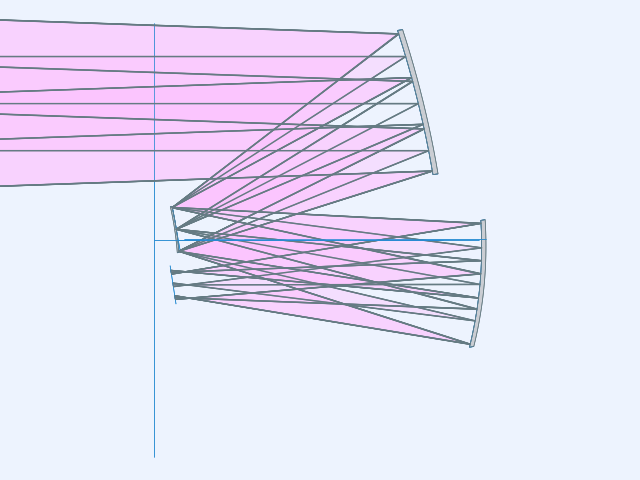

In [10]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

In [11]:
s2=sm.ifcs[2]

In [12]:
print(s2)

Surface(profile=Conic(c=-0.0009442965419001326, cc=-1.314566), interact_mode='reflect')


In [13]:
s2.decenter

'dec and return': Decenter: array([ 0.      , 48.695345,  0.      ]), Tilt: array([8.438645, 0.      , 0.      ])

In [14]:
s2.decenter.dec[1]

48.695345

In [15]:
s2.clear_apertures[0].y_half_width

78.538674

In [16]:
sm.lcl_tfrms

[(array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
  array([0.e+00, 0.e+00, 1.e+11])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.98917358, -0.14675024],
         [-0.        ,  0.14675024,  0.98917358]]),
  array([  0.      ,  48.695345, 300.      ])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.99951678, -0.03108376],
         [ 0.        ,  0.03108376,  0.99951678]]),
  array([   0.        ,    3.65673555, -278.48522488])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.99995252,  0.00974437],
         [ 0.        , -0.00974437,  0.99995252]]),
  array([0.        , 6.19416217, 0.11958827])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.9999967 ,  0.00256846],
         [ 0.        , -0.00256846,  0.9999967 ]]),
  array([  0.        ,  -4.33380275, 323.0147928 ])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.99

In [17]:
sm.gbl_tfrms

[(array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
  array([ 0.e+00,  0.e+00, -1.e+11])),
 (array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
  array([0., 0., 0.])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.98917358,  0.14675024],
         [ 0.        , -0.14675024,  0.98917358]]),
  array([  0.      ,  48.695345, 300.      ])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.98413404,  0.17742656],
         [ 0.        , -0.17742656,  0.98413404]]),
  array([ 0.      , 11.444717, 23.993147])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.98581623,  0.16782837],
         [ 0.        , -0.16782837,  0.98581623]]),
  array([ 0.      , 17.561821, 23.011829])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.98624404,  0.16529579],
         [ 0.        , -0.16529579,  0.98624404]]),
  array([  0.      ,  67.500535, 342.172389])),
 

In [18]:
for i,trfm in enumerate(sm.gbl_tfrms):
    print("{}: {:12.7g} {:12.7g} {:12.7g}".format(i, trfm[1][0], trfm[1][1], trfm[1][2]))

0:            0            0       -1e+11
1:            0            0            0
2:            0     48.69535          300
3:            0     11.44472     23.99315
4:            0     17.56182     23.01183
5:            0     67.50053     342.1724
6:            0    -47.68134     20.55136


In [19]:
for i,ifc in enumerate(sm.ifcs):
    if ifc.decenter is not None:
        dec = ifc.decenter.dec
        print("{}: {:12.7g} {:12.7g} {:12.7g}".format(i, dec[0], dec[1], dec[2]))

2:            0     48.69535            0
3:            0     11.44472            0
4:            0     17.56182            0
5:            0     67.50053            0
6:            0    -47.68134            0


In [20]:
pt0 = np.array([0., 10., 0.])
dir0 = np.array([0., 0., 1.])
wvl = sm.central_wavelength()
cr0 = rt.trace(sm, pt0, dir0, wvl)
list_ray(cr0[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000     10.00000            0     0.000000     0.000000     1.000000        1e+11
  1:      0.00000     10.00000            0     0.000000     0.000000     1.000000       305.01
  2:      0.00000    -39.01227     -0.71851     0.000000    -0.073586    -0.997289       276.56
  3:      0.00000    -63.05024            0     0.000000    -0.042551    -0.999094       8.2271
  4:      0.00000    -69.67243      -7.6607     0.000000    -0.475052     0.879958       313.21
  5:      0.00000   -214.27020      -54.514     0.000000     0.493900    -0.869519        323.9
  6:      0.00000      6.13888            0     0.000000     0.481750    -0.876308            0


In [21]:
sm.stop_surface

3

In [22]:
s5=sm.ifcs[5]

In [23]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)

In [24]:
oa_ray = trace_base(opm, [0., 0.], fld, wvl)

In [25]:
list_ray(oa_ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000            0     0.000000     0.000000     1.000000        1e+11
  1:      0.00000    144.92753            0     0.000000     0.000000     1.000000       281.15
  2:      0.00000     97.95712      -4.5275     0.000000    -0.325473    -0.945551       289.73
  3:      0.00000      0.00000            0     0.000000    -0.295924    -0.955211  -7.4781e-08
  4:      0.00000     -6.19503    -0.059224     0.000000    -0.341403     0.939917       327.93
  5:      0.00000   -113.85435      -14.558     0.000000     0.163748    -0.986502       326.08
  6:      0.00000     -0.02444            0     0.000000     0.150002    -0.988686            0


In [26]:
list_ray(oa_ray, tfrms=sm.gbl_tfrms)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000       -1e+11     0.000000     0.000000     1.000000        1e+11
  1:      0.00000    144.92753            0     0.000000     0.000000     1.000000       281.15
  2:      0.00000    144.92753       281.15     0.000000    -0.460709    -0.887551       289.73
  3:      0.00000     11.44472       23.993     0.000000    -0.460709    -0.887551  -7.4781e-08
  4:      0.00000     11.44472       23.993     0.000000    -0.178816     0.983882       327.93
  5:      0.00000    -47.19394       346.63     0.000000    -0.001569    -0.999999       326.08
  6:      0.00000    -47.70550       20.555     0.000000    -0.001569    -0.999999            0


In [27]:
s5.clear_apertures[0].bounding_box()

(array([ -66.581268, -177.807751]), array([ 66.581268, -46.900709]))

In [28]:
vars(s5.clear_apertures[0])

{'x_offset': 0.0,
 'y_offset': -112.35423,
 'rotation': 0.0,
 'x_half_width': 66.581268,
 'y_half_width': 65.453521}

In [29]:
vars(s5.decenter)

{'_dtype': 'dec and return',
 'dec': array([ 0.      , 67.500535,  0.      ]),
 'euler': array([9.514418, 0.      , 0.      ]),
 'rot_pt': array([0., 0., 0.]),
 'rot_mat': array([[ 1.        ,  0.        , -0.        ],
        [ 0.        ,  0.98624404,  0.16529579],
        [ 0.        , -0.16529579,  0.98624404]])}

In [30]:
si=sm.ifcs[-1]

In [31]:
vars(si.decenter)

{'_dtype': 'decenter',
 'dec': array([  0.      , -47.681342,   0.      ]),
 'euler': array([8.716957, 0.      , 0.      ]),
 'rot_pt': array([0., 0., 0.]),
 'rot_mat': array([[ 1.        ,  0.        , -0.        ],
        [ 0.        ,  0.98844908,  0.15155336],
        [ 0.        , -0.15155336,  0.98844908]])}